In [ ]:
# Load Dependencies
from transformers import AutoModel, AutoTokenizer
import torch
import numpy as np
from umap import UMAP
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Load the model and tokenizer for gnerate embeddings
model = AutoModel.from_pretrained("microsoft/deberta-v3-large")
tokenizer = AutoTokenizer.from_pretrained("microsoft/deberta-v3-large", use_fast=False)

In [6]:
# Generate embeddings from model for all tokens in tokenizer dictionary
embeddings_dict = {}
embeddings = []
id_vocab = {v:k for k,v in tokenizer.vocab.items()}
for i in range(len(id_vocab)):
    out1 = model.embeddings.word_embeddings(torch.tensor([i]).unsqueeze(0)).detach()
    tok_emb = model.embeddings.LayerNorm(out1)
    embeddings_dict[id_vocab[i]] = i
    embeddings.append(torch.squeeze(tok_emb.detach()))
embeddings = torch.vstack(embeddings)

In [ ]:
# Normalize embeddings using standard scale normalizer
scaler = StandardScaler()
embeddings_scaled = scaler.fit_transform(embeddings)

In [ ]:
%%time
# Reduce embeddings dimention to 64 features using UMAP
reducer = UMAP(n_neighbors=15, n_components=64, min_dist=0.1, metric='cosine', random_state=42, verbose=True)
embeddings64 = reducer.fit_transform(embeddings_scaled)
embeddings64.shape

f:\Articles\CGNet\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
f:\Articles\CGNet\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP(angular_rp_forest=True, metric='cosine', n_components=64, n_jobs=1, random_state=42, verbose=True)
Tue Jun 17 21:59:33 2025 Construct fuzzy simplicial set
Tue Jun 17 21:59:33 2025 Finding Nearest Neighbors
Tue Jun 17 21:59:34 2025 Building RP forest with 23 trees
Tue Jun 17 22:00:09 2025 NN descent for 17 iterations
	 1  /  17
	 2  /  17
	 3  /  17
	 4  /  17
	 5  /  17
	 6  /  17
	 7  /  17
	 8  /  17
	 9  /  17
	 10  /  17
	 11  /  17
	 12  /  17
	 13  /  17
	 14  /  17
	 15  /  17
	 16  /  17
	 17  /  17
	Stopping threshold met -- exiting after 17 iterations
Tue Jun 17 22:02:34 2025 Finished Nearest Neighbor Search
Tue Jun 17 22:02:46 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Tue Jun 17 22:11:30 2025 Finished embedding


(128000, 64)

In [ ]:
# Saving 64D embeddings and loading them from the saved file for test
with open(rf'data\ReducedEmbeddings\deberta_larg_reduced_embeddings_64.npy', 'wb') as f:
    np.save(f, embeddings64, False)

with open(rf'data\ReducedEmbeddings\deberta_larg_reduced_embeddings_64.npy', 'rb') as f:
    embeddings64 = torch.tensor(np.load(f, allow_pickle=False))
embeddings64.shape

torch.Size([128000, 64])

In [ ]:
%%time
# Reduce embeddings dimention to 128 features using UMAP
reducer = UMAP(n_neighbors=15, n_components=128, min_dist=0.1, metric='cosine', random_state=42, verbose=True)
embeddings128 = reducer.fit_transform(embeddings_scaled)
embeddings128.shape

f:\Articles\CGNet\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
f:\Articles\CGNet\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP(angular_rp_forest=True, metric='cosine', n_components=128, n_jobs=1, random_state=42, verbose=True)
Tue Jun 17 22:15:50 2025 Construct fuzzy simplicial set
Tue Jun 17 22:15:50 2025 Finding Nearest Neighbors
Tue Jun 17 22:15:51 2025 Building RP forest with 23 trees
Tue Jun 17 22:16:15 2025 NN descent for 17 iterations
	 1  /  17
	 2  /  17
	 3  /  17
	 4  /  17
	 5  /  17
	 6  /  17
	 7  /  17
	 8  /  17
	 9  /  17
	 10  /  17
	 11  /  17
	 12  /  17
	 13  /  17
	 14  /  17
	 15  /  17
	 16  /  17
	 17  /  17
	Stopping threshold met -- exiting after 17 iterations
Tue Jun 17 22:18:28 2025 Finished Nearest Neighbor Search
Tue Jun 17 22:18:36 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Tue Jun 17 22:32:21 2025 Finished embedding


(128000, 128)

In [20]:
# Saving 128D embeddings and loading them from the saved file for test
with open(r'data\ReducedEmbeddings\deberta_larg_reduced_embeddings_128a.npy', 'wb') as f:
    np.save(f, embeddings128, False)
    
with open(r'data\ReducedEmbeddings\deberta_larg_reduced_embeddings_128a.npy', 'rb') as f:
    embeddings128 = torch.tensor(np.load(f, allow_pickle=False))
embeddings128.shape

torch.Size([128000, 128])

In [21]:
# Prepare a list of tokens in four category to visualize how well the feature reduction workded
extra_tokens = {
    'g': ['good', 'bad', 'nice', 'evil', 'pleasant', 'awful', 'love', 'wicked'],
    'b': ['king', 'queen', 'prince', 'princess', 'crown', 'sovereign', 'duke'],
    'y': ['car', 'traffic', 'bicycle', 'bus', 'train', 'truck', 'motorcycle', 'lane', 'highway'],
    'r': ['basketball', 'ball', 'soccer', 'tennis', 'cricket', 'football', 'golf', 'baseball']
}

target_tokens = []
color_codes = []
for color, tokens in extra_tokens.items():
    for token in tokens:
        target_tokens.append(token)
        color_codes.append(color)

idx = [tokenizer.vocab[t] for t in target_tokens]
embeddings[idx] # to make sure embeddings are loaded and works correctly
embeddings64[idx] # to make sure embeddings are loaded and works correctly
embeddings128[idx] # to make sure embeddings are loaded and works correctly
all_vocab = [id_vocab[i] for i in range(len(tokenizer.vocab))]
target_vocab = [all_vocab[i] for i in idx]

In [22]:
# Prepare a t-SNE to make 2D-features four three sets of embeddings
tsne = TSNE(n_components=2, perplexity=30, early_exaggeration=1, max_iter=300, metric='cosine')

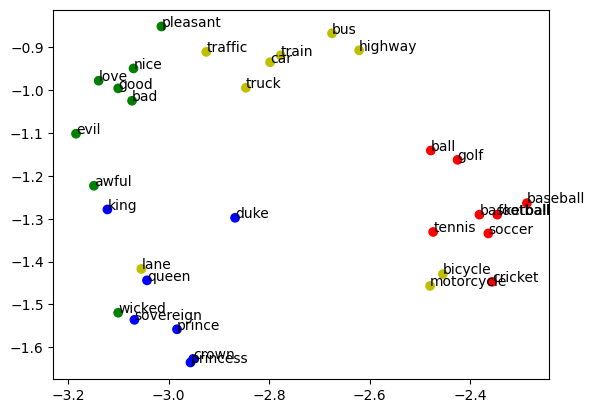

In [23]:
# Visual the original embeddings output from the model
X_tsne = tsne.fit_transform(embeddings_scaled[idx])
df = pd.DataFrame(X_tsne, index=target_vocab, columns=['x', 'y'])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['x'], df['y'], c=color_codes)
for word, pos in df.iterrows():
    ax.annotate(word, pos)
plt.show()

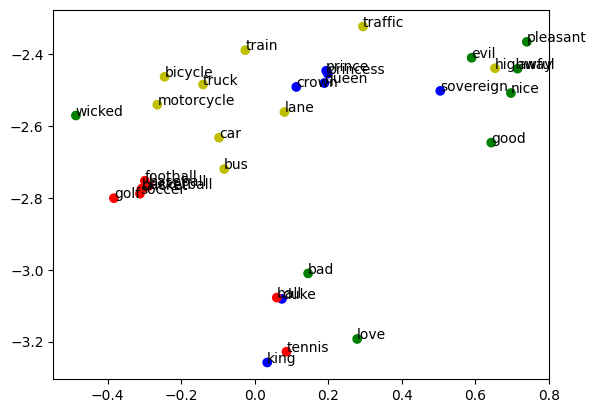

In [24]:
# Visual the 128-D embeddings output from the UMAP
X_tsne = tsne.fit_transform(embeddings128[idx])
df = pd.DataFrame(X_tsne, index=target_vocab, columns=['x', 'y'])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['x'], df['y'], c=color_codes)
for word, pos in df.iterrows():
    ax.annotate(word, pos)
plt.show()

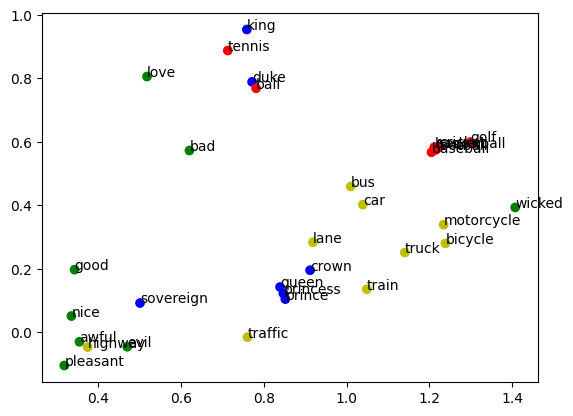

In [25]:
# Visual the 64-D embeddings output from the UMAP
X_tsne = tsne.fit_transform(embeddings64[idx])
df = pd.DataFrame(X_tsne, index=target_vocab, columns=['x', 'y'])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['x'], df['y'], c=color_codes)
for word, pos in df.iterrows():
    ax.annotate(word, pos)
plt.show()